In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Change to yours src folder path

In [2]:
% cd /content/drive/MyDrive/mvi-sp/src

/content/drive/MyDrive/mvi-sp/src


In [3]:
import gc
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

from config import *
from models import small_test, u_net, u_net_bn, DCGAN

## Load random frames from partitions

In [4]:
X = None
Y = None
flag = False
part = random.choice(os.listdir(PARTITIONS_PATH))
arr = np.load(os.path.join(PARTITIONS_PATH, part))

X = arr['X']
Y = arr['Y']

## Normalize input for both NNs

In [5]:
samples_in_line = 5
rows = 3

samples_cnt = np.shape(X)[0]
ids = random.sample(range(0,samples_cnt),samples_in_line)
X = X[ids]
Y = Y[ids]
X_cnn = X / 255.0
X_dcgan = (X - 127.5)/127.5

## Load models, weights and generate middle frames 

In [59]:
cnn = keras.models.load_model(os.path.join(WEIGHTS_PATH, 'unetbn-0.0065.hdf5'))
Y_cnn = cnn(X_cnn, training = False)
Y_cnn = Y_cnn * 255.0
Y_cnn = np.array(Y_cnn).astype("uint8")
dcgan = DCGAN()
dcgan.built = True
dcgan.load_weights(os.path.join(WEIGHTS_PATH, 'gan-0.6931.hdf5'))
Y_dcgan = dcgan.generator(X_dcgan, training = False)
Y_dcgan = Y_dcgan * 127.5 + 127.5
Y_dcgan = np.array(Y_dcgan).astype("uint8")

## Create comparison graphic

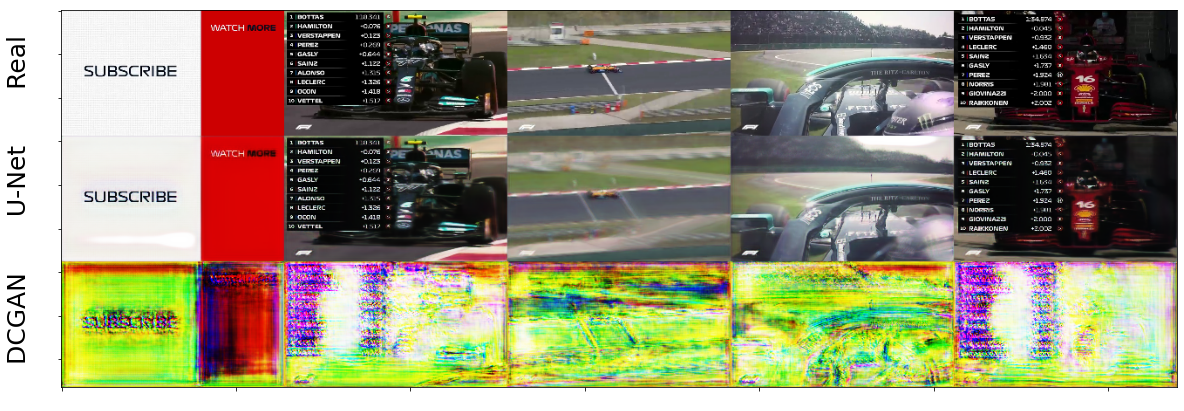

In [70]:
img_arr = [y for x in [Y, Y_cnn, Y_dcgan] for y in x]
img_arr = np.array(img_arr)

def image_grid(array, ncols=5):
    index, height, width, channels = array.shape
    nrows = index//ncols

    img_grid = (
        array.reshape(nrows, ncols, height, width, channels)
        .swapaxes(1,2)
        .reshape(height*nrows, width*ncols, 3)
    )

    return img_grid

result = image_grid(img_arr)
fig = plt.figure(figsize=(20., 20.))
plt.imshow(result)
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylabel('DCGAN       U-Net       Real', fontsize=25)
plt.savefig('sample.png', dpi=300)